# Task 5 - Decision Tree and Random Forests

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('heart.csv')
print(df.head())

   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  


In [3]:
X = df.drop('target', axis=1)  # assuming 'target' is the label
y = df['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [4]:
dt = DecisionTreeClassifier(max_depth=4, random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [5]:
print("Train Accuracy:", accuracy_score(y_train, dt.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, dt.predict(X_test)))

Train Accuracy: 0.8829268292682927
Test Accuracy: 0.8


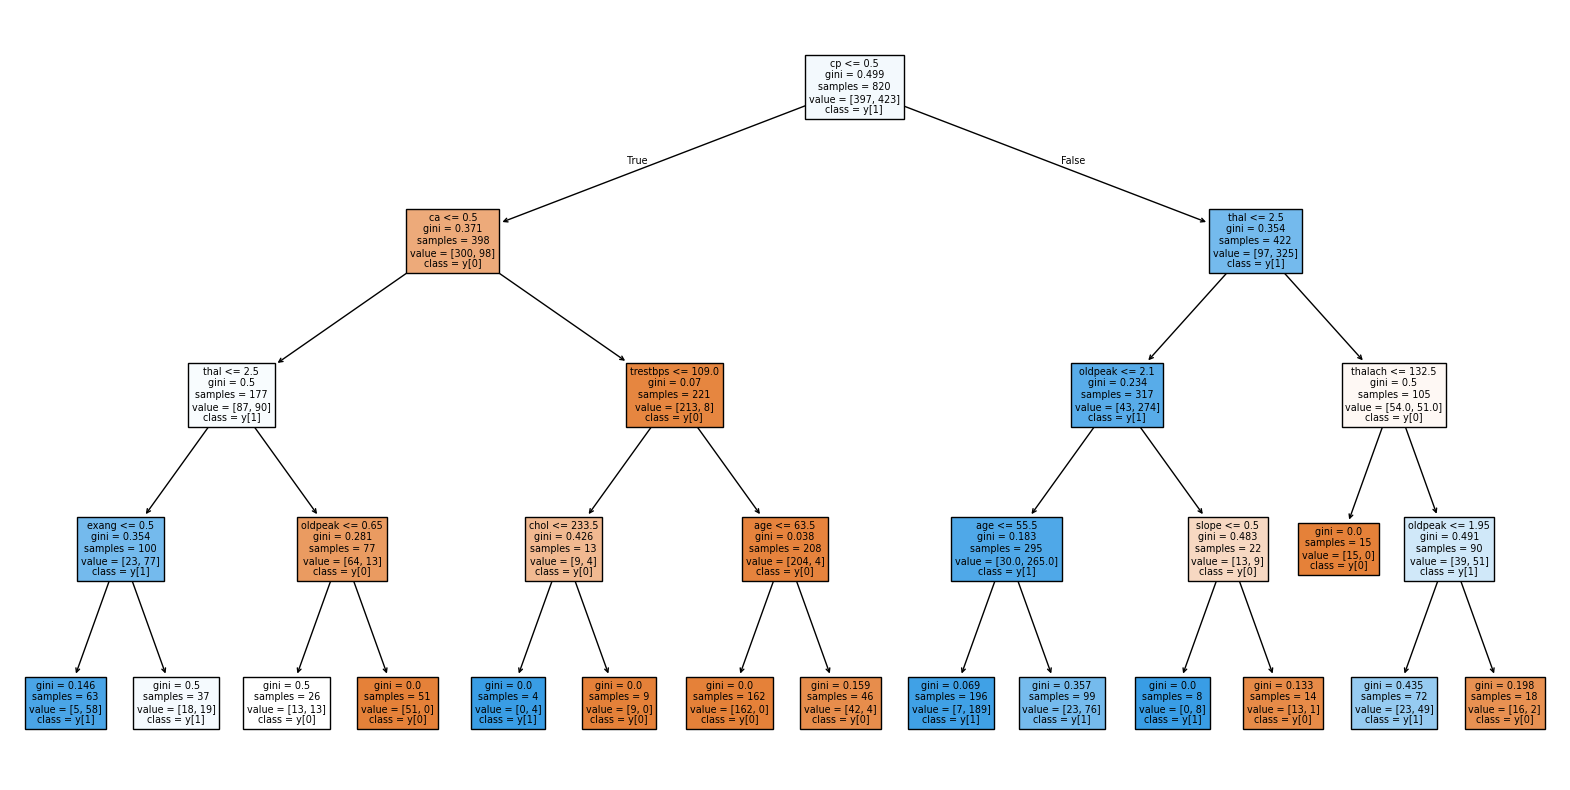

In [6]:
plt.figure(figsize=(20,10))
tree.plot_tree(dt, feature_names=X.columns, class_names=True, filled=True)
plt.show()

In [7]:
from sklearn.model_selection import cross_val_score

for depth in range(1, 10):
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    scores = cross_val_score(model, X, y, cv=5)
    print(f"Depth {depth}: Mean CV Accuracy = {scores.mean():.3f}")

Depth 1: Mean CV Accuracy = 0.760
Depth 2: Mean CV Accuracy = 0.737
Depth 3: Mean CV Accuracy = 0.830
Depth 4: Mean CV Accuracy = 0.834
Depth 5: Mean CV Accuracy = 0.891
Depth 6: Mean CV Accuracy = 0.950
Depth 7: Mean CV Accuracy = 0.972
Depth 8: Mean CV Accuracy = 0.987
Depth 9: Mean CV Accuracy = 0.998


In [8]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

print("Train Accuracy:", accuracy_score(y_train, rf.predict(X_train)))
print("Test Accuracy:", accuracy_score(y_test, rf.predict(X_test)))

Train Accuracy: 1.0
Test Accuracy: 0.9853658536585366


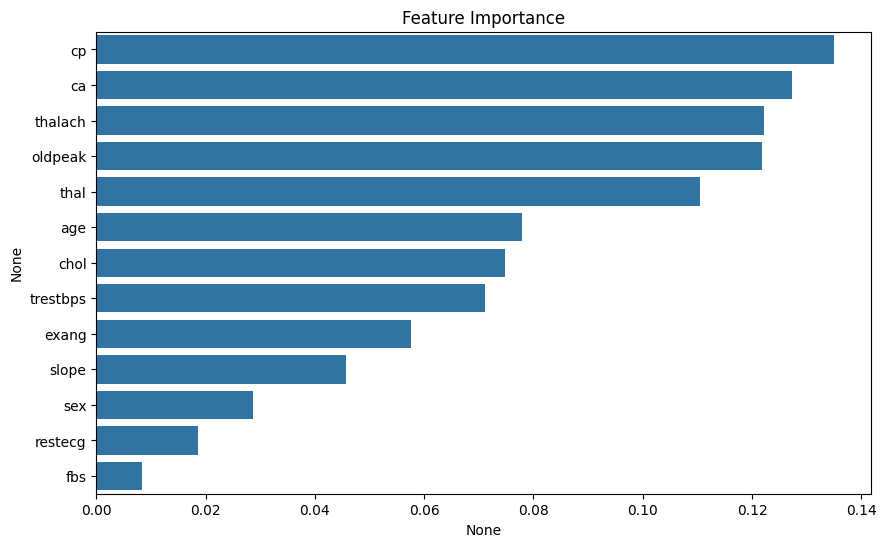

In [9]:
import seaborn as sns

importances = rf.feature_importances_
feat_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=feat_importance, y=feat_importance.index)
plt.title("Feature Importance")
plt.show()